## Wearable Tech: Week 2 Assignment

### Step 1

In [10]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime

#turns off warning for chained assignment as we are overwriting references to original dataframe
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', 30)

df = pd.read_csv("../Data/Soccer.csv", parse_dates=["Date"])
df

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06
...,...,...,...,...,...,...,...,...,...
9549,100,2ND HALF,D,353.77399,8.55915,127,0,127.00000,2019-11-24
9550,21,2ND HALF,D,532.78271,10.43649,129,129,129.00000,2019-11-24
9551,43,2ND HALF,M,486.08109,12.38176,217,0,170.76598,2019-11-24
9552,91,2ND HALF,F,226.33687,8.09753,128,128,128.00000,2019-11-24


### Step 2

### Step 3

In [9]:
session_data = df[df["Period.Name"] == "Session"]
session_data

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06
...,...,...,...,...,...,...,...,...,...
9499,23,Session,GK,185.24280,4.66020,0,0,0.00000,2019-11-24
9500,21,Session,D,1364.75000,9.87637,129,0,129.00000,2019-11-24
9501,43,Session,M,1294.72809,11.25361,225,0,166.42591,2019-11-24
9502,91,Session,F,633.34450,6.94490,128,0,128.00000,2019-11-24


### Step 4

In [13]:
df["Session.Duration"] = df["Total.Player.Load"] / df["Player.Load.Per.Minute"]
df

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date,Session.Duration
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06,18.054328
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06,16.941335
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06,16.143162
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06,18.900662
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06,18.310667
...,...,...,...,...,...,...,...,...,...,...
9549,100,2ND HALF,D,353.77399,8.55915,127,0,127.00000,2019-11-24,41.332841
9550,21,2ND HALF,D,532.78271,10.43649,129,129,129.00000,2019-11-24,51.049990
9551,43,2ND HALF,M,486.08109,12.38176,217,0,170.76598,2019-11-24,39.257835
9552,91,2ND HALF,F,226.33687,8.09753,128,128,128.00000,2019-11-24,27.951347


### Step 5

In [16]:
player_load = df.groupby("Player.Name")["Total.Player.Load"].sum().reset_index()

# Rank the players by cumulative player load
player_load_ranked = player_load.sort_values(by="Total.Player.Load", ascending=False)
player_load_ranked

,Player.Name,Total.Player.Load
11,43,123614.13172
16,62,113785.63359
0,4,109062.13083
6,21,104897.69005
12,44,91057.22634
18,66,88070.33112
26,100,86870.35755
10,39,85933.66549
3,12,85188.94294
15,52,83932.54732


### Step 6

In [23]:
with open("../Data/schedule.txt", "r") as file:
    schedule_data = file.readlines()

# Extract the game dates from the schedule
game_dates = []
for line in schedule_data:
    # Check if the line contains a date in the format "MMM DD (Day)"
    if len(line.strip()) > 3 and line.strip()[3] == " ":
        game_date = line.strip().split()[0]  # Extracting the date part
        game_dates.append(game_date)

# Filter soccer data for sessions on game days
game_day_sessions = df[df['Date'].isin(game_dates)]

# Sort sessions by player load in descending order to find the top 10 sessions
top_10_sessions = game_day_sessions.nlargest(10, 'Total.Player.Load')

# Display the top 10 sessions and count of game day sessions
print("Top 10 Sessions with Highest Player Load on Game Days:")
print(top_10_sessions)

# Count how many of these top sessions occurred on game days
count_game_day_sessions = top_10_sessions[top_10_sessions['Date'].isin(game_dates)].shape[0]
print("\nNumber of Top 10 Sessions that Occurred on Game Days:", count_game_day_sessions)

Top 10 Sessions with Highest Player Load on Game Days:
Empty DataFrame
Columns: [Player.Name, Period.Name, Position.Name, Total.Player.Load, Player.Load.Per.Minute, Maximum.Heart.Rate, Minimum.Heart.Rate, Avg.Heart.Rate, Date, Session.Duration]
Index: []

Number of Top 10 Sessions that Occurred on Game Days: 0


### Step 7 

In [25]:
players_to_remove = [98, 62, 89, 23, 71]

# Remove players with the specified IDs
df = df[~df['Player.Name'].isin(players_to_remove)]
df

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date,Session.Duration
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06,18.054328
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06,16.143162
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06,18.900662
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06,18.310667
5,35,Session,F,315.51553,16.69335,0,0,0.00000,2019-08-06,18.900672
...,...,...,...,...,...,...,...,...,...,...
9549,100,2ND HALF,D,353.77399,8.55915,127,0,127.00000,2019-11-24,41.332841
9550,21,2ND HALF,D,532.78271,10.43649,129,129,129.00000,2019-11-24,51.049990
9551,43,2ND HALF,M,486.08109,12.38176,217,0,170.76598,2019-11-24,39.257835
9552,91,2ND HALF,F,226.33687,8.09753,128,128,128.00000,2019-11-24,27.951347


### Step 8

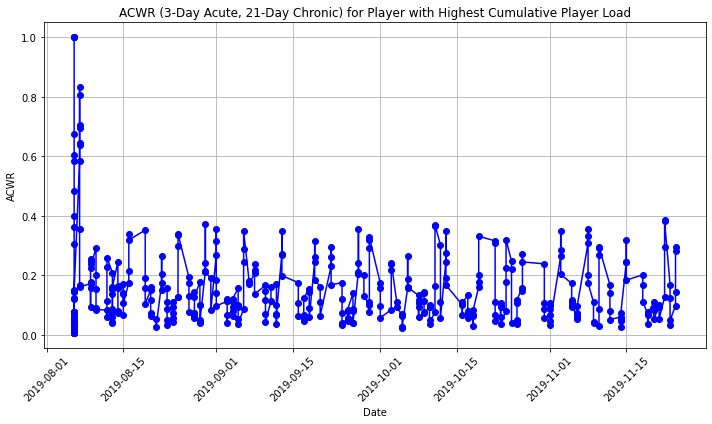

In [28]:
player_load = df.groupby("Player.Name")["Total.Player.Load"].sum().reset_index()

# Identify the player with the highest cumulative player load
player_with_highest_load = player_load.loc[player_load["Total.Player.Load"].idxmax(), "Player.Name"]

# Filter data for the player with the highest load
player_data = df[df["Player.Name"] == player_with_highest_load]

# Convert 'Date' column to datetime format
player_data['Date'] = pd.to_datetime(player_data['Date'])

# Sort data by date
player_data = player_data.sort_values(by='Date')

# Calculate rolling sum of player load for acute (3-day) and chronic (21-day) windows
player_data['Acute Load'] = player_data['Total.Player.Load'].rolling(window=3, min_periods=1).sum()
player_data['Chronic Load'] = player_data['Total.Player.Load'].rolling(window=21, min_periods=1).sum()

# Calculate ACWR
player_data['ACWR'] = player_data['Acute Load'] / player_data['Chronic Load']

# Plot ACWR
plt.figure(figsize=(10, 6))
plt.plot(player_data['Date'], player_data['ACWR'], color='blue', marker='o', linestyle='-')
plt.title('ACWR (3-Day Acute, 21-Day Chronic) for Player with Highest Cumulative Player Load')
plt.xlabel('Date')
plt.ylabel('ACWR')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 9

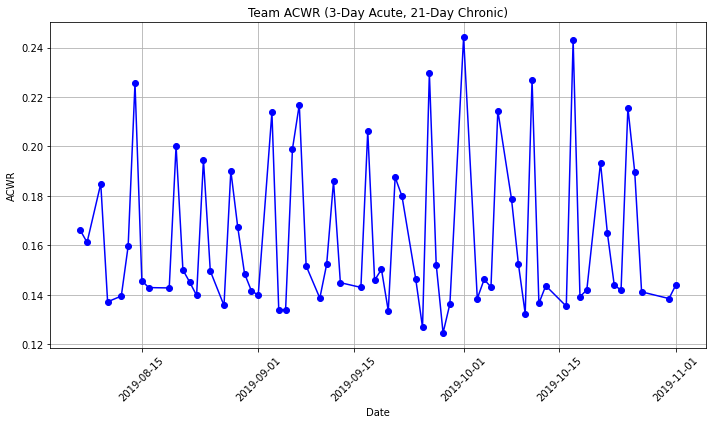

In [29]:
df = df.sort_values(by='Date')

# Calculate rolling sum of player load for acute (3-day) and chronic (21-day) windows
df['Acute Load'] = df.groupby('Player.Name')['Total.Player.Load'].rolling(window=3, min_periods=1).sum().reset_index(drop=True)
df['Chronic Load'] = df.groupby('Player.Name')['Total.Player.Load'].rolling(window=21, min_periods=1).sum().reset_index(drop=True)

# Calculate ACWR for each player
df['ACWR'] = df['Acute Load'] / df['Chronic Load']

# Aggregate ACWR values across all players for each date
team_acwr = df.groupby('Date')['ACWR'].mean()

# Plot ACWR for the entire team
plt.figure(figsize=(10, 6))
plt.plot(team_acwr.index, team_acwr.values, color='blue', marker='o', linestyle='-')
plt.title('Team ACWR (3-Day Acute, 21-Day Chronic)')
plt.xlabel('Date')
plt.ylabel('ACWR')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 10

In [32]:
df['ACWR'] = df['Acute Load'] / df['Chronic Load']

# Aggregate ACWR values across all players for each date
team_acwr = df.groupby('Date')['ACWR'].mean()

# Identify dates where ACWR exceeds the threshold
dates_above_threshold = team_acwr[team_acwr > 1.5].index

# Print the dates
print("Dates where the team's ACWR exceeded the 1.5 threshold:")
print(dates_above_threshold)

Dates where the team's ACWR exceeded the 1.5 threshold:
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [35]:
schedule = {}
for line in schedule_data:
    if len(line.strip()) > 3 and line.strip()[3] == " ":
        date, event = line.strip().split()[0], line.strip().split(" ", 1)[1]
        schedule[date] = event

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate cumulative session duration for each day
session_duration_by_day = df.groupby('Date')['Session.Duration'].sum()

# Identify the day with the lowest non-zero cumulative session duration
lowest_duration_day = session_duration_by_day[session_duration_by_day > 0].idxmin()

# Print the lowest duration date to verify its format
print("Lowest cumulative team session duration day:", lowest_duration_day)

# Find the corresponding event in the schedule
try:
    event_on_lowest_duration_day = schedule[str(lowest_duration_day.date())]
    print("Event on this day according to the schedule:", event_on_lowest_duration_day)
except KeyError:
    print("No event found on this day according to the schedule.")

Lowest cumulative team session duration day: 2019-08-21 00:00:00
No event found on this day according to the schedule.
